In [14]:
import numpy as np
import copy
import matplotlib.pyplot as plt

from keras.datasets import mnist

np.random.seed(1)

In [15]:
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [16]:
train_X.shape

(60000, 28, 28)

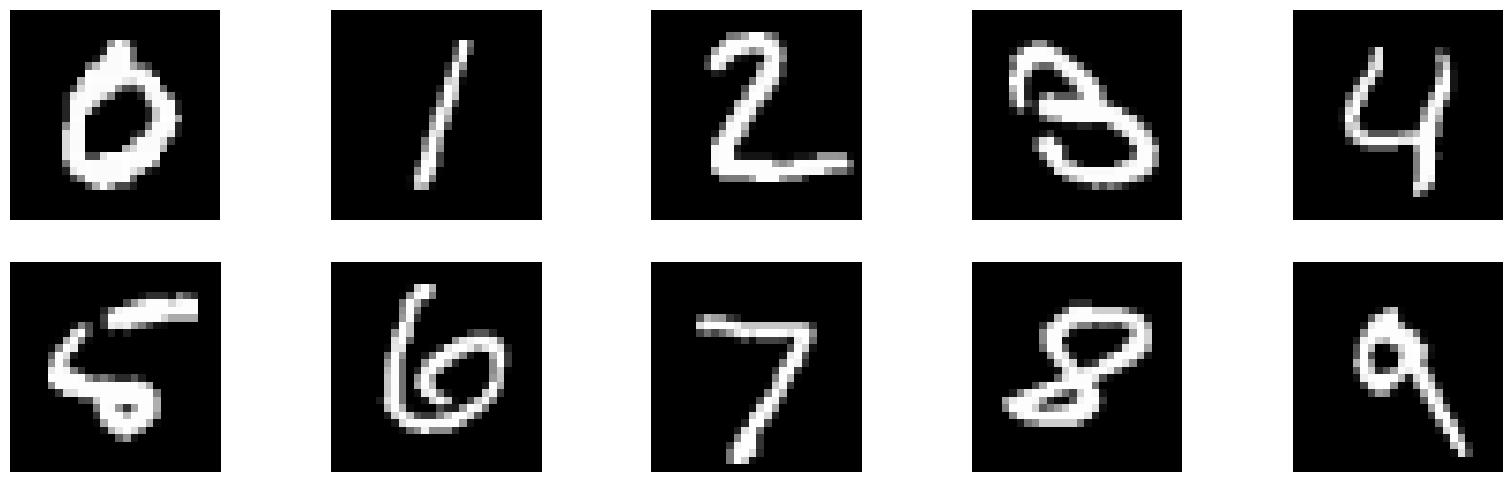

In [27]:
fig, axs = plt.subplots(2, 5, figsize = (20,6))
axs = axs.flatten()

for i in range(len(axs)):
    index = list(test_y).index(i)
    digit = test_X[index, :, :]
    axs[i].imshow(digit, cmap='gray')
    axs[i].axis('off')

    plt.savefig(f'plot/03-651340543-NEGRO-dataset.png', dpi=400, bbox_inches="tight",  transparent=True)


In [7]:
X_train = (np.array(train_X).reshape(train_X.shape[0], train_X.shape[1] * train_X.shape[2])).T
T_train = np.zeros((10, X_train.shape[1]))
for i, n in enumerate(train_y):
    T_train[n][i] = 1

In [8]:
X_test = (np.array(test_X).reshape(test_X.shape[0], test_X.shape[1] * test_X.shape[2])).T
T_test = np.zeros((10, X_test.shape[1]))
for i, n in enumerate(test_y):
    T_test[n][i] = 1

In [9]:
def NN(X: list, Y: list, eps: float, eta: float, print_rate=1, max_epoch=10000) -> list:
    print(f'X.shape: {X.shape}')
    print(f'Y.shape: {Y.shape}')
    epoch = 0
    history = list()
    W = np.random.uniform(-1, 1, (Y.shape[0], X.shape[0]))
    print(f'W.shape: {W.shape}')
    while epoch < max_epoch:
        history.append(0)
        for i in range(X.shape[1]):
            v = W @ X[:, i:i+1]
            pred_value = np.argmax(v)

            if Y[pred_value, i] != 1:
                history[epoch] += 1

        if epoch % print_rate == 0:
            print(f'{epoch}: errors -> {history[epoch]}; % -> {history[epoch] / X.shape[1]}')
            
        epoch += 1

        if (history[epoch - 1] / X.shape[1]) <= eps:
            break

        for i in range(X.shape[1]):
            W = W + eta * ((Y[:, i:i+1] - np.heaviside(W @ X[:, i:i+1], 0))) @ X[:, i:i+1].T

    plt.plot(history, marker = 'o')
    #plt.title("Curve of misprediction during epoches (n = 0.1, # of sample = 100)")
    plt.xlabel('Number of epochs')
    plt.ylabel('Number of misclassification')
    plt.grid()
    # plt.savefig('plot/history-50samples-eta1.png', dpi=400, bbox_inches="tight", transparent=True)
    plt.savefig(f'plot/history-{X.shape[1]}samples-eta{eta}-{eps}tollerance.png', dpi=400, bbox_inches="tight")

    plt.clf()

    return W


In [10]:
def test(W: list, X: list, Y: list):
    errors = 0
    for i in range(X.shape[1]):
        v = np.heaviside(W @ X[:, i], 0)
        true_value = Y[:, i].tolist().index(1)
        if v[true_value] != 1:
            errors += 1
    print(f'Errors: {errors}; Percentage: {errors/Y.shape[1]:.2f}')

In [11]:
print(T_train[:, :50].shape)
W = NN(copy.deepcopy(X_train[:, :50]), copy.deepcopy(T_train[:, :50]), 0, 1)
test(W, X_test, T_test)

(10, 50)
X.shape: (784, 50)
Y.shape: (10, 50)
W.shape: (10, 784)
0: errors -> 47; % -> 0.94
1: errors -> 15; % -> 0.3
2: errors -> 3; % -> 0.06
3: errors -> 3; % -> 0.06
4: errors -> 0; % -> 0.0
Errors: 5610; Percentage: 0.56


<Figure size 640x480 with 0 Axes>

In [12]:
W = NN(copy.deepcopy(X_train[:, :1000]), copy.deepcopy(T_train[:, :1000]), 0, 1)
test(W, X_test, T_test)

X.shape: (784, 1000)
Y.shape: (10, 1000)
W.shape: (10, 784)
0: errors -> 914; % -> 0.914
1: errors -> 184; % -> 0.184
2: errors -> 159; % -> 0.159
3: errors -> 154; % -> 0.154
4: errors -> 104; % -> 0.104
5: errors -> 71; % -> 0.071
6: errors -> 79; % -> 0.079
7: errors -> 32; % -> 0.032
8: errors -> 93; % -> 0.093
9: errors -> 39; % -> 0.039
10: errors -> 53; % -> 0.053
11: errors -> 46; % -> 0.046
12: errors -> 41; % -> 0.041
13: errors -> 31; % -> 0.031
14: errors -> 29; % -> 0.029
15: errors -> 15; % -> 0.015
16: errors -> 14; % -> 0.014
17: errors -> 27; % -> 0.027
18: errors -> 18; % -> 0.018
19: errors -> 23; % -> 0.023
20: errors -> 8; % -> 0.008
21: errors -> 6; % -> 0.006
22: errors -> 15; % -> 0.015
23: errors -> 44; % -> 0.044
24: errors -> 18; % -> 0.018
25: errors -> 15; % -> 0.015
26: errors -> 14; % -> 0.014
27: errors -> 10; % -> 0.01
28: errors -> 10; % -> 0.01
29: errors -> 6; % -> 0.006
30: errors -> 24; % -> 0.024
31: errors -> 4; % -> 0.004
32: errors -> 6; % -> 0

<Figure size 640x480 with 0 Axes>

In [13]:
W = NN(copy.deepcopy(X_train[:, :]), copy.deepcopy(T_train[:, :]), 0.12, 1, print_rate=1)
test(W, X_test, T_test)

X.shape: (784, 60000)
Y.shape: (10, 60000)
W.shape: (10, 784)
0: errors -> 54259; % -> 0.9043166666666667


KeyboardInterrupt: 

In [24]:
eta = [0.01, 0.1, 10]

for i in range(3):
    W = NN(copy.deepcopy(X_train[:, :]), copy.deepcopy(T_train[:, :]), 0.13, eta[i], print_rate=50)
    test(W, X_test, T_test)

X.shape: (784, 60000)
Y.shape: (10, 60000)
W.shape: (10, 784)
0: errors -> 53228; % -> 0.8871333333333333
50: errors -> 9428; % -> 0.15713333333333335
Errors: 1783; Percentage: 0.18
X.shape: (784, 60000)
Y.shape: (10, 60000)
W.shape: (10, 784)
0: errors -> 53228; % -> 0.8871333333333333
50: errors -> 9147; % -> 0.15245
100: errors -> 8232; % -> 0.1372
Errors: 2022; Percentage: 0.20
X.shape: (784, 60000)
Y.shape: (10, 60000)
W.shape: (10, 784)
0: errors -> 53228; % -> 0.8871333333333333
50: errors -> 9028; % -> 0.15046666666666667
Errors: 1847; Percentage: 0.18


<Figure size 640x480 with 0 Axes>